### Clustering- ISLR -Exercise 10.7

#### Problem 3.a
In this problem, you will perform K-means clustering manually, with K = 2, on a small example withn = 6 observations and p =2 features. The observations are as follows.

     Obs X1 X2
      1   1  4
      2   1  3
      3   0  4
      4   5  1
      5   6  2
      6   4  0
Plot the observation

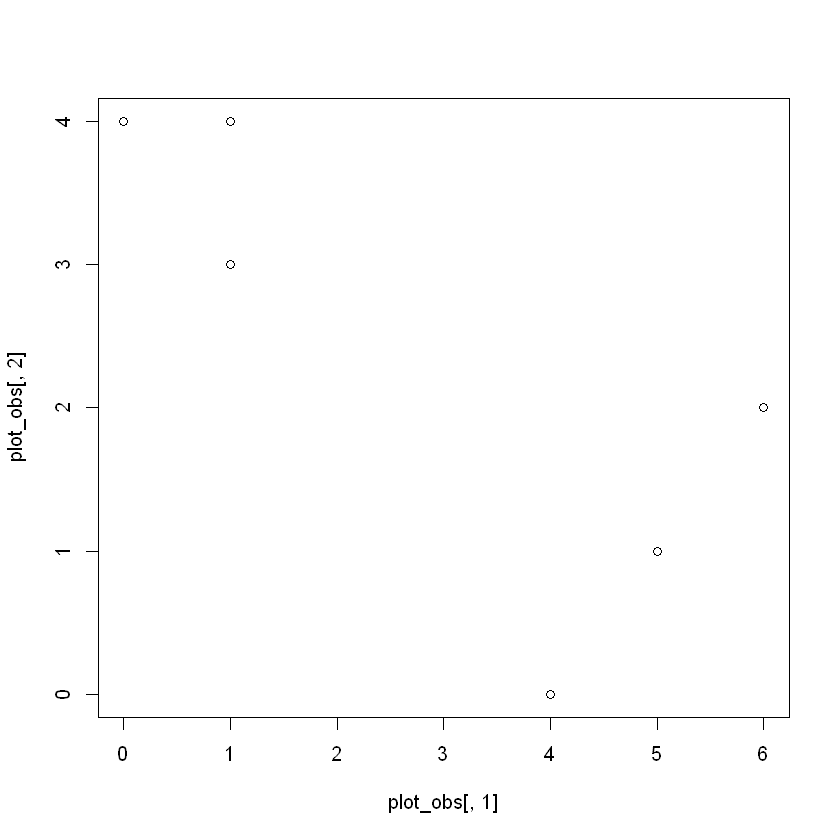

In [33]:
plot_obs <- cbind(c(1,1,0,5,6,4), c(4,3,4,1,2,0))
plot(plot_obs[,1], plot_obs[,2])


The given observations are plotted 

#### Problem3.b
Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation. 

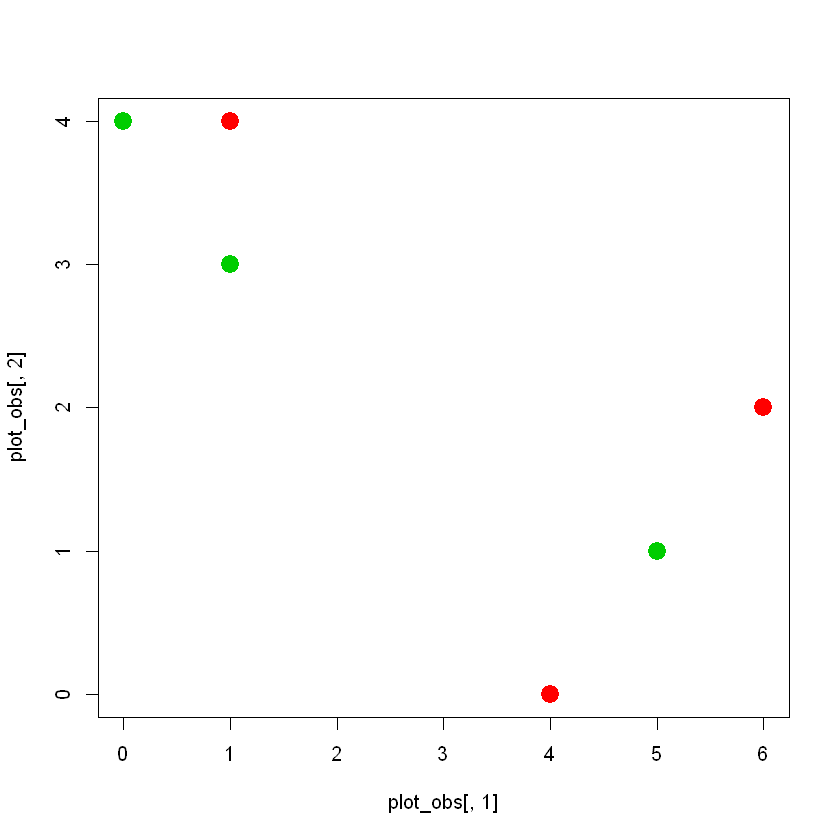

In [34]:
k <- 2
cluster_label <- sample(k, nrow(plot_obs), replace = TRUE)
plot(plot_obs[,1], plot_obs[,2],cex = 2, pch = 19, col = (cluster_label + 1))


Used sample function to randomly assign a cluster label to each observation

 #### Problem 3.c
 Compute the centroid for each cluster. 

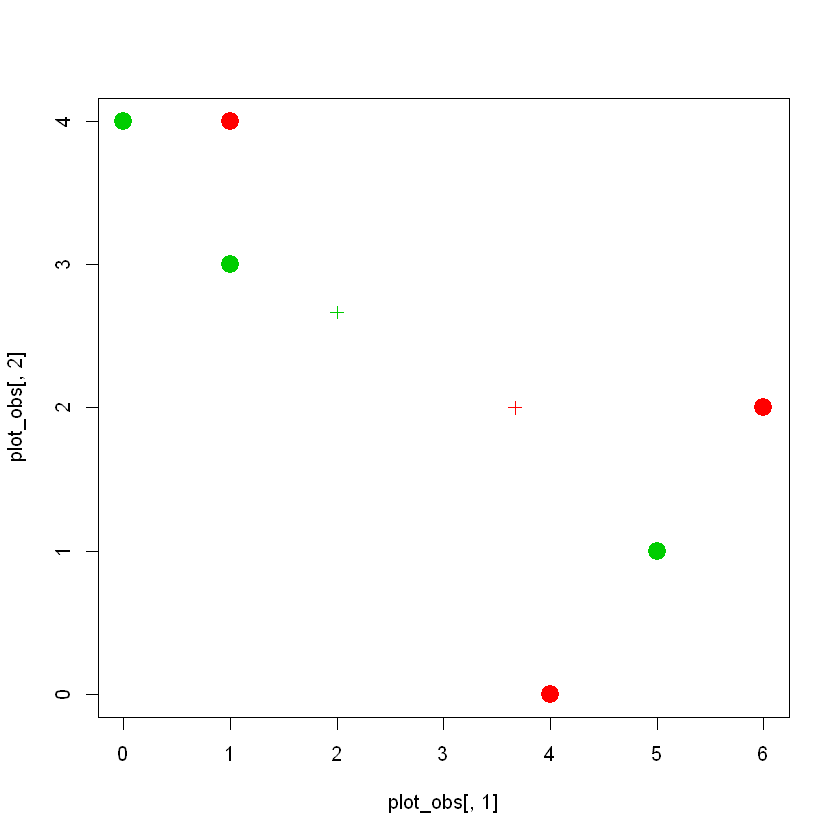

In [35]:
centroid_compute1<- c(mean(plot_obs[cluster_label == 1,1]),mean(plot_obs[cluster_label == 1,2]))
centroid_compute2 <- c(mean(plot_obs[cluster_label == 2,1]),mean(plot_obs[cluster_label == 2,2]))
plot(plot_obs[,1], plot_obs[,2],cex = 2, pch = 19, col = (cluster_label + 1))
points(centroid_compute1[1], centroid_compute1[2], col = 2, pch = 3)
points(centroid_compute2[1], centroid_compute2[2], col = 3, pch = 3)

The centroid is calculated by taking the mean of the cluster labels on both the axis. In this case the mean value for green clusters along plot_obs[,1] and the mean value for green clusters along plot_obs[,2] are calcuated and the points derived out of it is used as centroid. Likewise for red clusters also values are calculated and plotted.

#### Problem 3.d
Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation. 

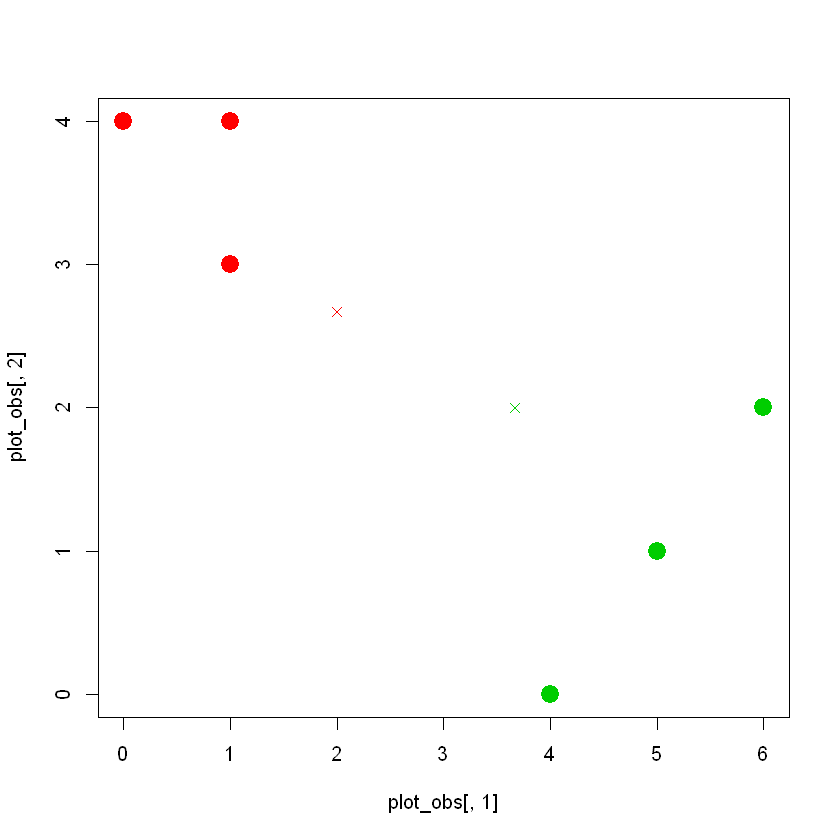

In [36]:
cluster_labels <- c(1,1,1,2,2,2)
plot(plot_obs[,1], plot_obs[,2],cex = 2, pch = 19, col = (cluster_labels + 1))
points(centroid_compute1[1], centroid_compute1[2], col = 3, pch = 4)
points(centroid_compute2[1], centroid_compute2[2], col = 2, pch = 4)

The observations are assigned to the centroid to which it is closest

#### Problem 3.e
Repeat (c) and (d) until the answers obtained stop changing

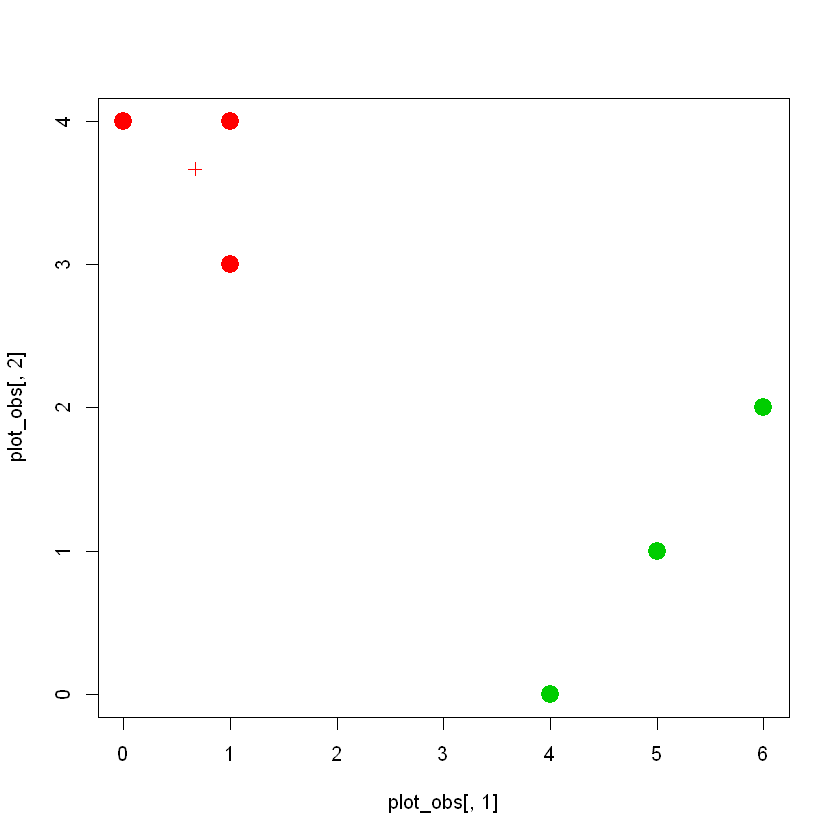

In [39]:
centroid_compute1<- c(mean(plot_obs[cluster_labels == 1,1]),mean(plot_obs[cluster_labels == 1,2]))
centroid_compute2 <- c(mean(plot_obs[cluster_labels == 2,1]),mean(plot_obs[cluster_labels == 2,2]))
plot(plot_obs[,1], plot_obs[,2],cex = 2, pch = 19, col = (cluster_labels + 1))
points(centroid_compute1[1], centroid_compute1[2], col = 2, pch = 3)
points(centroid_compute2[1], centroid_compute2[2], col = 3, pch = 3)

After repeating the previous 2 steps the answers stopped changing at this point and hence stopped at this step 

#### Problem 3.f
In your plot from (a), color the observations according to the cluster labels obtained.

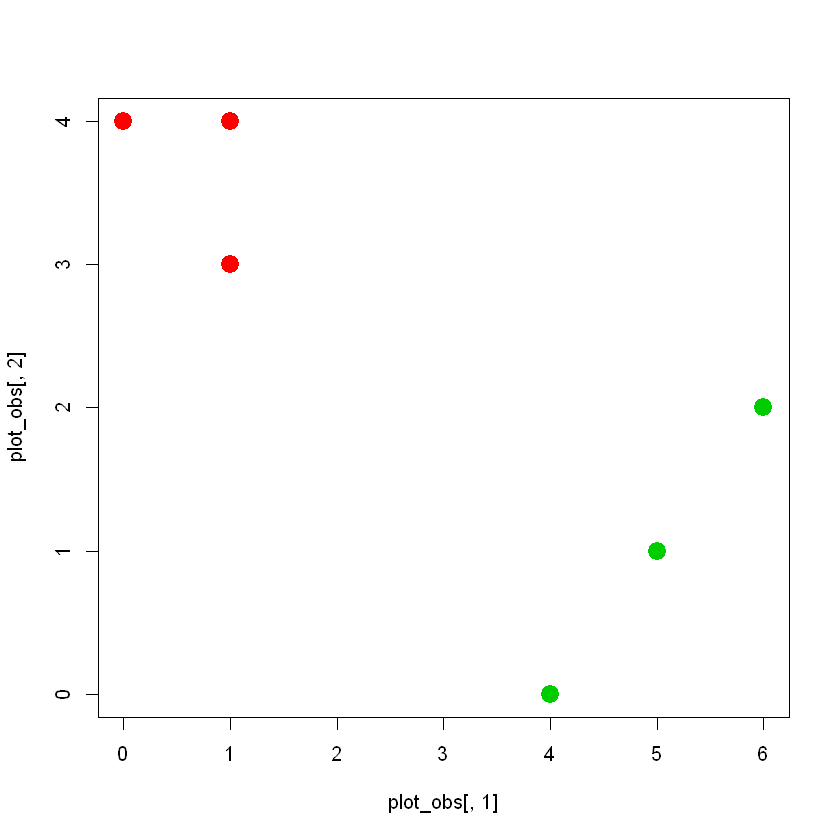

In [41]:
plot(plot_obs[,1], plot_obs[,2],cex = 2, pch = 19, col = (cluster_labels + 1))

#### Problem 5
In words, describe the results that you would expect if you performed K-means clustering of the eight shoppers in Figure 10.14, on the basis of their sock and computer purchases, with K = 2. Give three answers, one for each of the variable scaling  displayed. Explain.

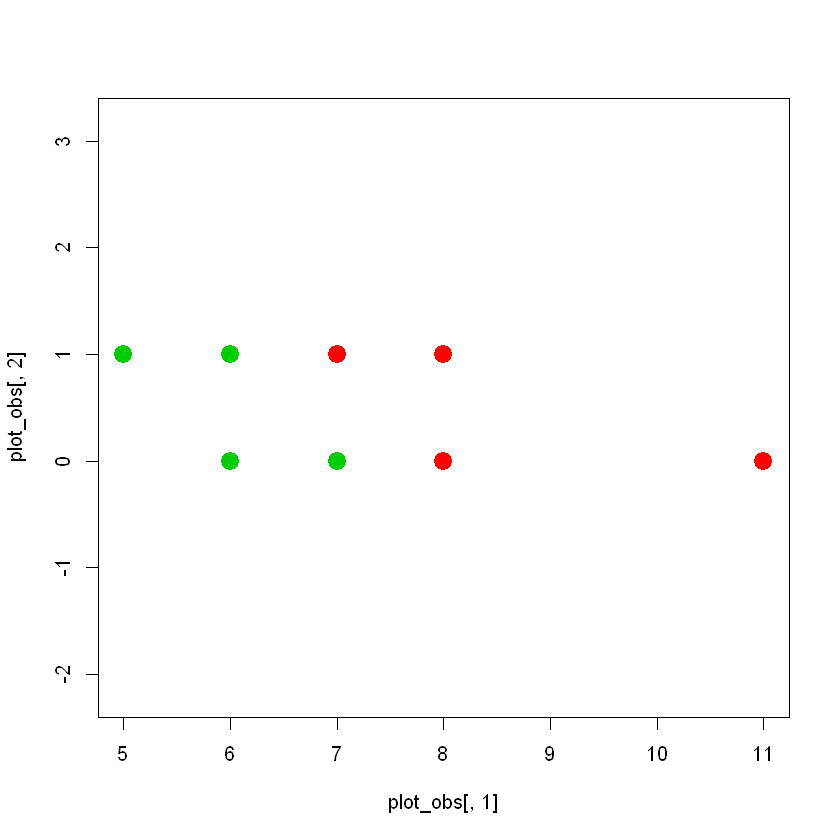

In [2]:
#Least socks and computers (3, 4, 6, 8) versus more socks and computers (1, 2, 7, 8)
socks <- c(8,11,7,6,5,6,7,8)
computers <- c(0,0,0,0,1,1,1,1)
plot_obs <- cbind(socks, computers)
label <- c(1,1,2,2,2,2,1,1)
plot(plot_obs[, 1], plot_obs[, 2], col=(label + 1), pch = 19, cex = 2, asp = 1)

In [3]:
#Purchased computer (5, 6, 7, 8) versus no computer purchase (1, 2, 3, 4)
plot_obs <- cbind(scale(socks), scale(computers))
sd(computers)

[1] 0.5345225

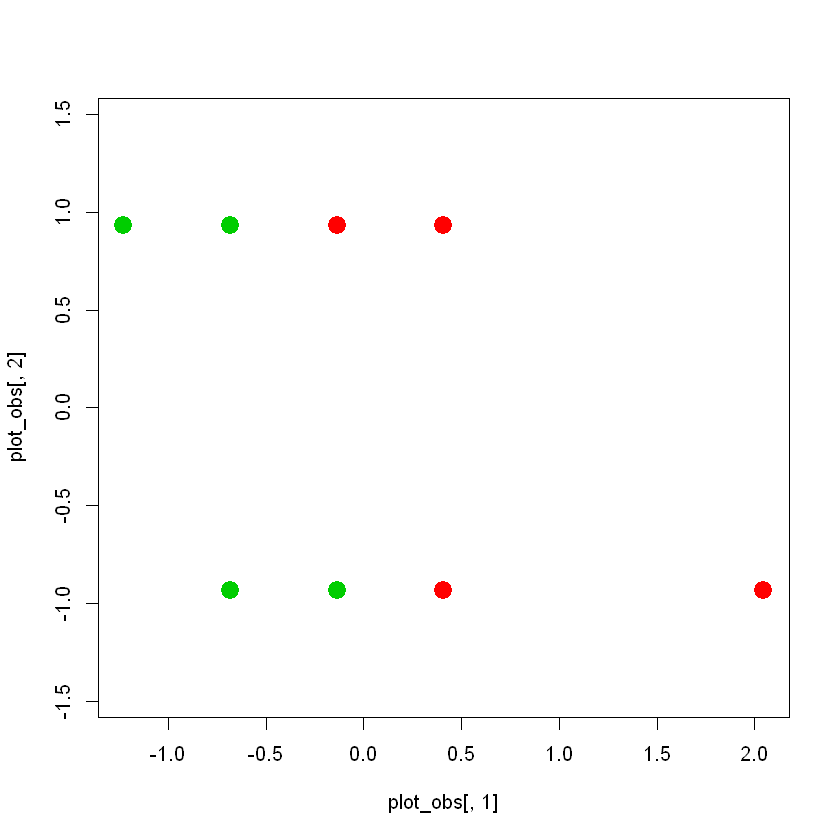

In [4]:
#Purchased computer (5, 6, 7, 8) versus no computer purchase (1, 2, 3, 4)
plot(plot_obs[, 1], plot_obs[, 2], col=(label + 1), pch = 19, cex = 2, asp = 1)

#### Problem 6.a
A researcher collects expression measurements for 1,000 genes in 100 tissue samples. The data can be written as a 1, 000 × 100 matrix, which we call X, in which each row represents a gene and each column a tissue sample. Each tissue sample was processed on a different day, and the columns of X are ordered so that the samples that were processed earliest are on the left, and the samples that were processed later are on the right. The tissue samples belong to two groups: control (C) and treatment (T). The C and T samples were processed in a random order across the days. The researcher wishes to determine whether each gene’s expression measurements differ between the treatment and control groups.

As a pre-analysis (before comparing T versus C), the researcher performs a principal component analysis of the data, and finds that the first principal component (a vector of length 100) has a strong linear trend from left to right, and explains 10% of the variation. The researcher now remembers that each patient sample was run on one of two machines, A and B, and machine A was used more often in the earlier times while B was used more often later. The researcher has a record of which sample was run on which machine.

(a) Explain what it means that the first principal component “explains 10% of the variation”.

It means 90% of the information in the gene data set is lost by projecting the tissue sample observations onto the first     principal component

#### Problem 6.b
The researcher decides to replace the (i, j)th element of X with xij − zi1φj1 where zi1 is the ith score, and φj1 is the jth loading, for the first principal component. He will then perform a two-sample t-test on each gene in this new data set in order to determine whether its expression differs between the two conditions. Critique this idea, and suggest a better approach.

The better approach is to include the machine used (A Vs B) as a feature of the data set. This should enhance the Proportion of Variance explained of the first principal component before applying the two-sample t-test.

#### Problem 6.c
Design and run a small simulation experiment to demonstrate the superiority of your idea.

In [8]:
set.seed(1)
C <- matrix(rnorm(50 * 1000), ncol = 50)
T <- matrix(rnorm(50 * 1000), ncol = 50)
X <- cbind(C, T)
X[1, ] <- seq(-18, 18 - .36, .36)
print <- prcomp(scale(X))
summary(print)$importance[, 1]

Standard deviation Proportion of Variance  Cumulative Proportion 
              3.148148               0.099110               0.099110

9.911% variance is explained by the first principal component.

In [9]:
#Adding in A vs B via 10 vs 0 encoding
X <- rbind(X, c(rep(10, 50), rep(0, 50)))
print <- prcomp(scale(X))
summary(print)$importance[, 1]

Standard deviation Proportion of Variance  Cumulative Proportion 
              3.397839               0.115450               0.115450

11.545% variance is explained by the first principal component. There is an improvement of 1.634%

#### Problem 7
In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let rij denote the correlation between the ith and jth observations, then the quantity 1−rij is proportional to the squared Euclidean distance between the ith and jth observations. 

On the USArrests data, show that this proportionality holds.

Hint: The Euclidean distance can be calculated using the dist() function,
and correlations can be calculated using the cor() function.

In [11]:
library(ISLR)
set.seed(123)
X <- scale(USArrests)
Y1 <- dist(X)^2
Y2 <- as.dist(1 - cor(t(X)))
summary(Y2 / Y1)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000086 0.069135 0.133943 0.234193 0.262589 4.887686 

#### Problem 8.a
In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp() function.

On the USArrests data, calculate PVE in two ways:
(a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.

In [12]:
# Applying PCA to USArrest dataset
pca<-prcomp(USArrests,scale=TRUE)
pca_variation<-pca$sdev^2

# PVE by each component
pve<-pca_variation/sum(pca_variation)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

#### Problem 8.b
By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then,
use those loadings in Equation 10.8 to obtain the PVE.

In [13]:
loadings<-pca$rotation
USArrest_data <- scale(USArrests)
sum_variation <- sum(apply(as.matrix(USArrest_data)^2, 2, sum))
apply((as.matrix(USArrest_data) %*% loadings)^2, 2, sum) / sum_variation

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

#### Problem 10.a
In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in R that you can use to generate data. One example is the rnorm() function; runif() is
another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [30]:
set.seed(111)
x <- matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1
labels<-c(rep(1,20),rep(2,20),rep(3,20))

#### Problem 10.b
Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

Importance of components%s:
                          PC1    PC2      PC3      PC4      PC5      PC6
Standard deviation     1.0085 0.5823 0.001733 0.001669 0.001616 0.001573
Proportion of Variance 0.7499 0.2500 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.7499 1.0000 0.999970 0.999970 0.999970 0.999970
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     0.001535 0.001477 0.001462 0.001393 0.001384 0.001362
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999980
                           PC13     PC14    PC15     PC16     PC17     PC18
Standard deviation     0.001333 0.001267 0.00123 0.001209 0.001174 0.001123
Proportion of Variance 0.000000 0.000000 0.00000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999990 0.99999 0.999990 0.999990 0.999990
                           PC19     PC20     PC21      PC22      PC2

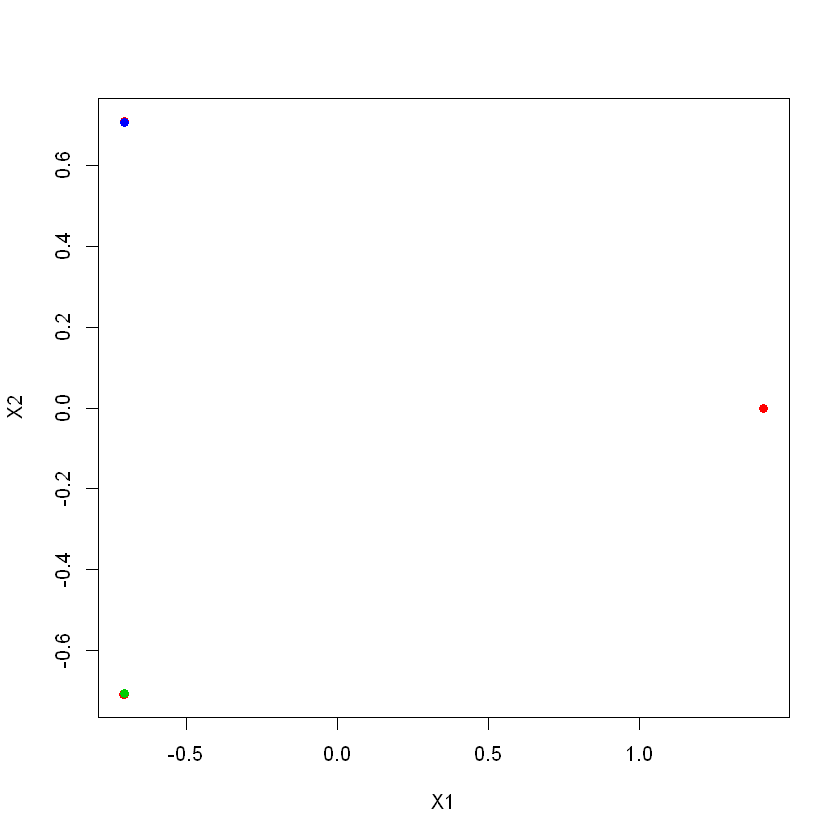

In [33]:
pca <-prcomp(x)
summary (pca)
plot(pca$x[,1:2], col=2:4, xlab="X1", ylab="X2", pch=19) 


#### Problem 10.c
Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering
compare to the true class labels?

Hint: You can use the table() function in R to compare the true class labels to the class labels obtained by clustering. Be careful 
how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [34]:
k_means <- kmeans(x, 3, nstart = 20)
table(labels, k_means$cluster)

      
labels  1  2  3
     1  0 20  0
     2 20  0  0
     3  0  0 20

They are clustered properly

#### Problem 10.d
Perform K-means clustering with K = 2. Describe your results.

In [35]:
k_means <- kmeans(x, 2, nstart = 20)
table(labels, k_means$cluster)

      
labels  1  2
     1  0 20
     2 20  0
     3  0 20

Now only two clusters are there and one of the clusters from previous observation is removed.

#### Problem 10.e
Now perform K-means clustering with K = 4, and describe your results.

In [36]:
k_means <- kmeans(x, 4, nstart = 20)
table(labels, k_means$cluster)

      
labels  1  2  3  4
     1  0  0 20  0
     2  6 14  0  0
     3  0  0  0 20

Now the first cluster is split into two clusters and hence totally four clusters are there.

#### Problem 10.f
Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score
vector, and the second column is the second principal component score vector. Comment on the results.

In [38]:
k_means <- kmeans(pca$x[, 1:2], 3, nstart = 20)
table(labels, k_means$cluster)

      
labels  1  2  3
     1 20  0  0
     2  0  0 20
     3  0 20  0

They are clustered properly

#### Problem 10.g
Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard
deviation one. How do these results compare to those obtained in (b)? Explain.

In [39]:
k_means <- kmeans(scale(x), 3, nstart = 20)
table(labels, k_means$cluster)

      
labels  1  2  3
     1 11  8  1
     2  3  2 15
     3  4 11  5

Theobservations are not clustered properly and hence the results are worse than the  unscaled clustering. Scaling should be avoided since it affects the distance between the observations.

#### Problem 11.a
On the book website, www.StatLearning.com, there is a gene expression data set (Ch10Ex11.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

(a) Load in the data using read.csv(). You will need to select header=F

In [46]:
setwd("/Users/Thiya/Desktop/Wayne/Winter 2018/Statistical methods")
gene_data <- read.csv( "Ch10Ex11.csv", header = FALSE)
dim(gene_data)

[1] 1000   40

#### Problem 11.b
Apply hierarchical clustering to the samples using correlationbased distance, and plot the dendrogram. Do the genes separate
the samples into the two groups? Do your results depend on the type of linkage used?

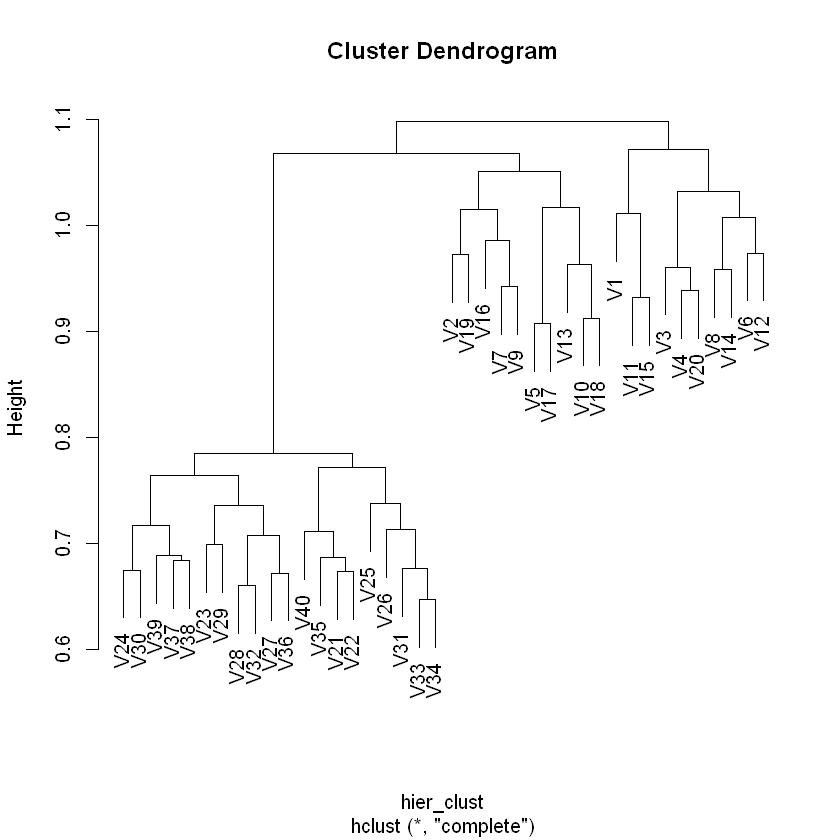

In [47]:
hier_clust = as.dist(1 - cor(gene_data))
plot(hclust(hier_clust, method="complete"))

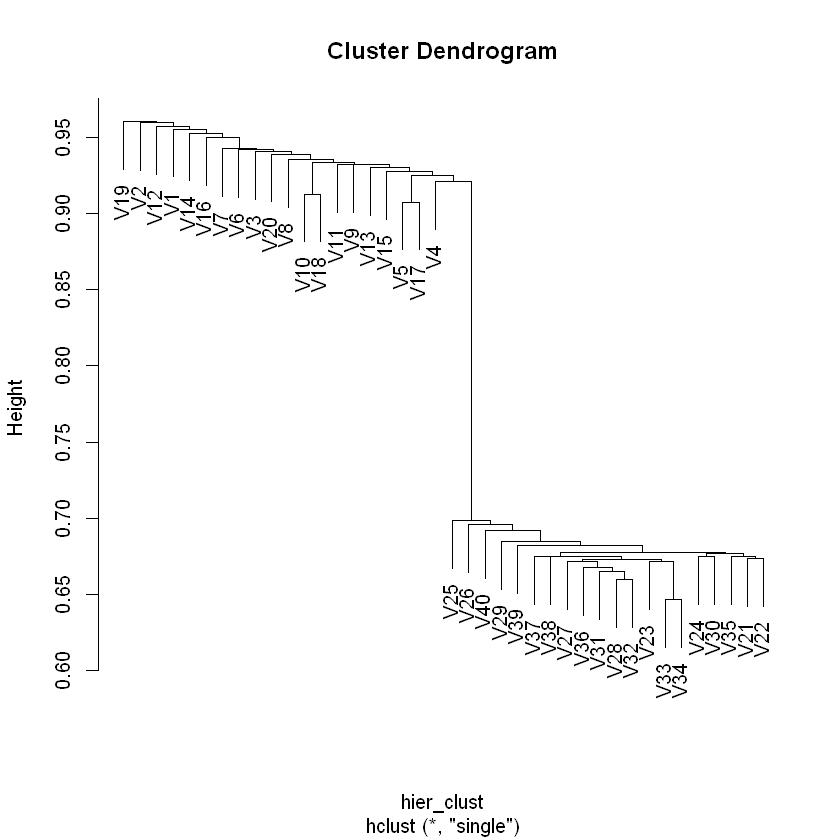

In [48]:
plot(hclust(hier_clust, method="single"))

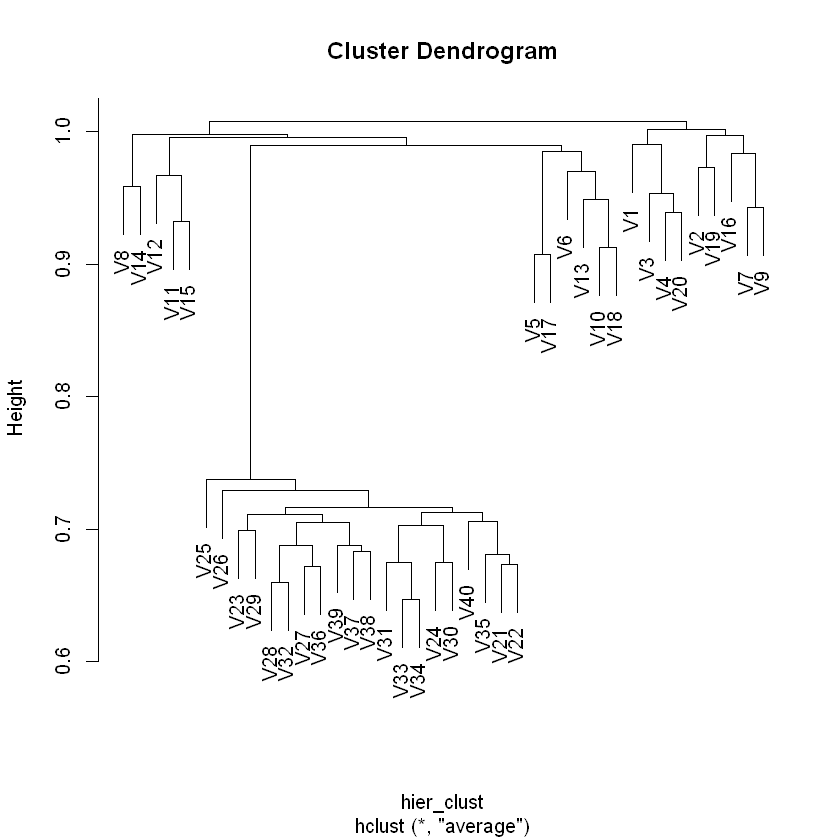

In [49]:
plot(hclust(hier_clust, method="average"))

The results are different when using different linkage methods.  The complete linkage and single linkage methods obtained two clusters while average linkage obtained three clusters.

#### Problem 11.c
Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question,
and apply it here.

To look at which genes differ the most across the healthy patients and diseased patients,can look at the loading vectors from PCA to see which genes are used to describe the variance the most.

In [50]:
pca <- prcomp(t(gene_data))
summary(pca$rotation)

      PC1                 PC2                  PC3            
 Min.   :-0.039023   Min.   :-1.038e-01   Min.   :-0.0912603  
 1st Qu.:-0.007576   1st Qu.:-2.139e-02   1st Qu.:-0.0216828  
 Median : 0.003187   Median : 3.018e-04   Median :-0.0007843  
 Mean   : 0.010175   Mean   : 8.936e-05   Mean   :-0.0003602  
 3rd Qu.: 0.014704   3rd Qu.: 2.088e-02   3rd Qu.: 0.0213629  
 Max.   : 0.114243   Max.   : 9.136e-02   Max.   : 0.0955025  
      PC4                  PC5                  PC6            
 Min.   :-0.1027021   Min.   :-0.0957204   Min.   :-0.1070332  
 1st Qu.:-0.0192341   1st Qu.:-0.0209875   1st Qu.:-0.0199465  
 Median : 0.0008565   Median :-0.0010458   Median : 0.0002778  
 Mean   : 0.0016644   Mean   :-0.0003794   Mean   : 0.0017606  
 3rd Qu.: 0.0220969   3rd Qu.: 0.0195649   3rd Qu.: 0.0235945  
 Max.   : 0.0987227   Max.   : 0.1175350   Max.   : 0.1410351  
      PC7                  PC8                  PC9            
 Min.   :-0.1083423   Min.   :-0.0936678   Min.

In [51]:
loading <- apply(pca$rotation, 1, sum)
index <- order(abs(loading), decreasing = TRUE)
index[1:10]

[1] 865  68 911 428 624  11 524 803 980 822

These genes are the 10 most different genes across the group.